# E2_Digits, Wine, Breast Cancer


`08 JAN 2021`

-----------

> 1. Data 준비하기 
> 2. Data 이해하기 
> 3. train, test 데이터 분리
> 4. 다양한 모델로 학습시켜보기
> 5. 모델을 평가해보기


# Digits

## 1. load_digits : 손글씨를 분류해 봅시다

   #### 1. 필요한 모듈 import하기
------------

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#다양한 모델들 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


#### 2. 데이터 준비

----------------

In [2]:
digits = load_digits()
digits.keys()  #키라는 메서드로 digits에 어떤 정보가 담겨있는지 확인

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

#### 3. 데이터 이해하기

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

---------

In [3]:
digits_data = digits.data  # digits의 데이터를 digits_data 변수에 저장 
digits_label = digits.target #digits 데이터의 target을 digits_label이라는 변수에 저장 
print(digits.data.shape)


# target names 출력
# target names는 분류해야되는 10개 클래스 (0~9)까지의 숫자를 나타냄.
digits.target_names
print(digits.target_names)

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


In [4]:
#데이터 Describe 해보기

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**+ digits 이미지 확인해보기**

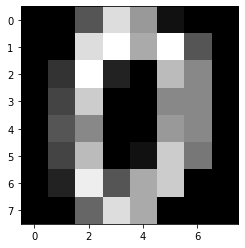

In [5]:
import matplotlib.pyplot as plt

image = digits_data[0].reshape(8,8)
plt.imshow(image, cmap='gray')
plt.show()


#### 4. train, test 데이터 분리

- 모델 학습과 테스트용 문제지와 정답지를 준비해 보자

데이터를 훈련 데이터와 테스트 데이터로 8:2 비율로 나눠주는것

20%의 데이터는 test 데이터셋에, 나머지 80%의 데이터는 train 데이터셋에 들어가도록 한다.

----

In [6]:
# 데이터 셋을  train_test_split 함수를 사용해 분리해보자 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))


X_train 개수:  1437 , X_test 개수:  360


In [7]:
# 나눈 data set을 확인해보자 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# 랜덤하게 섞인 라벨 확인 
y_train, y_test

#train 데이터와 test 데이터에 각 품종 카테고리가 균일하게 잘 섞일 수 있도록 train_test_split 함수가 데이터셋을 만들어냄


(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

#### 5. 다양한 모델로 학습시켜보기


#### - 학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다.  

어떤 모델이 가장 좋은 성능을 보일까요?

- **Decision Tree** 

- **Random Forest**

- **SVM (Support Vector Machine)**

- **SGD (Stochastic Gradient Descent) Classifier**

- **Logistic Regression**





#### 1) Decision Tree 

In [8]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



#### 2) Random Forest

In [9]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



#### 3) SVM 

In [10]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### 4) SGD Classifier 

In [11]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.92      0.83      0.88        42
           2       1.00      1.00      1.00        40
           3       1.00      0.79      0.89        34
           4       0.95      1.00      0.97        37
           5       0.82      1.00      0.90        28
           6       1.00      0.93      0.96        28
           7       0.97      0.97      0.97        33
           8       0.80      0.95      0.87        43
           9       0.93      0.88      0.90        32

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



#### 5) Logistic Regression

In [12]:
logistic_model = LogisticRegression(max_iter=4200)
logistic_model.fit(X_train, y_train)
y_pred =logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



#### 6. 모델을 평가해보기


- 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 
- 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? 
- sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 
- 선택하신 이유도 설명해 주세요.


----
#### 손글씨 digits을 분류할때 


- 1. 단순하게 손글씨 분류를 숫자 인식으로 어떤 숫자인지 판별 한다고 한다면 Accuracy를 평가 지표로 보면 된다고 생각한다.

- 2. 만약 은행이나, 기업에서 분류를 한다고 가정한다고 하면? (ex: 필적감정) 

digits data는 숫자 분류의 문제이다. 그렇기때문에 개인적으로 처음에는 acurracy를 평가지표로 봐야한다고 생각했다. 

그 후 팀원 분들과 여러 이야기를 나눠보니 정확하게 인식한 숫자에 대해 참인것을 참이라고 판단 할때가 의미가 있기 때문에 Recall 값을 평가지표로 선택하는 것이 좋을 것 같다라는 결론이 나왔다.






#### 그래서 결론적으로 손글씨 digits을 분류할때 가장 좋은 모델은?

  
> + Decision Tree       : 0.86
> + Random Forest       : 0.96
> + SVM                 : 0.99
> + SGD  Classifier     : 0.93
> + Logistic Regression : 0.95


 - 결과적으로 digits 데이터의 경우 SVM모델이 가장 정확도가 높았다.
    
 - 뿐만 아니라 Precision, Recall, F1 score의 값도 가장 높았기 때문에 **SVM** 모델이 가장 적합한 모델인것 같다고 결론을 내렸다. 




- 0은 모든 모델이 다 분류를 1.0으로 잘 분류하였다. 그 이유가 있을까?

- Dicision Tree 모델에서는 0을 제외한 나머지 숫자들의 분류 정확도가 낮았다. 각 모델마다 인식을 잘 못하는 숫자가 있는데 왜그런걸까?

- Dicision Tree모델의 결과값이 가장 낮았는데 왜그런걸까? 자세히 그 이유를 알아봐야겠다. (Random Forest는 Dicision Tree보다 발전된 단계인데 정확도 값의 차이가 꽤난다)




---------------------------

# Wine

## 2. load_wine : 와인을 분류해 봅시다


#### 1. 필요한 모듈 import하기

In [13]:
from sklearn.datasets import load_wine

wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### 2. 데이터 준비

In [14]:
wines = load_wine()

#### 3. 데이터 이해하기

In [15]:
# Feature, Label Data 지정
wines_data = wines.data     #wines의 데이터를 wines_data 변수에 저장 
wines_label = wines.target  #wines 데이터의 target을 wines_label이라는 변수에 저장


print(wines.data.shape)

(178, 13)


In [16]:
# target names 출력해보기
wines.target_names
print(wines.target_names)

['class_0' 'class_1' 'class_2']


In [17]:
# 데이터 Describe 해 보기
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [18]:
#DataFrame으로 구경해보기~~와인은 특별히 더 궁금했다 

import pandas as pd
wines_df = pd.DataFrame(data=wines_data, columns=wines.feature_names)


df = pd.DataFrame(wines.data, columns=wines.feature_names)
sy = pd.Series(wines.target, dtype="category")
sy = sy.cat.rename_categories(wines.target_names)
df['class'] = sy
wines_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### 4. train, test 데이터 분리

In [19]:
X_train, X_test, y_train, y_test = train_test_split(wines_data, 
                                                    wines_label, 
                                                    test_size=0.2, 
                                                    random_state=7)


#### 5. 다양한 모델로 학습시켜보기

#### 1) Decision Tree 

In [20]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### 2) Random Forest

In [21]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 3) SVM 

In [22]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### 4) SGD Classifier 

In [23]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.88      0.41      0.56        17
           2       0.44      0.92      0.59        12

    accuracy                           0.58        36
   macro avg       0.77      0.59      0.58        36
weighted avg       0.75      0.58      0.58        36



#### 5) Logistic Regression

In [24]:
logistic_model = LogisticRegression(max_iter=4200)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, logistic_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



#### 6. 모델을 평가해보기

----

#### wine을 분류할때 

- 단순하게 와인의 클래스를 맞추는 것이 중요하다면 **accuracy**를 평가 지표로 정하면 될것 같다.

   
- 와인의 종류가 무엇인가, 정확히 어떤 와인인가 라는것이 중요하다면 **Recall**이 알맞은 평가 지표인것 같다.

- 만약 13개의 feature 중, 나는 와인의 도수를 중심으로 와인의 클래스를 비교하고 싶다면? 


#### 그래서 결론적으로 wine을 분류할때 가장 좋은 모델은?


- 와인은 feature가 13개로 특징이 다양하다. 특징에 따라 와인의 종류를 분류 할 수 있기 때문에 종류를 확실하게 구분 할 수 있는 Random Forest가 가장 좋은 성능을 보일 것이라고 생각했다. 

  
>  + Decision Tree       : 0.94
>  + Random Forest       : 1.0
>  + SVM                 : 0.61
>  + SGD Classifier      : 0.59
>  + Logistic Regression : 0.97

 
- 결과를 확인해보니 Random Forest가 가장 높은 성능을 보였다.

- wine data는 왜 SVM, SGD 모델에서 현저하게 낮은 결과 값을 나타냈을까?

-------------------

# Breast Cancer

## 3.load_breast_cancer : 유방암 여부를 진단해 봅시다

#### 1. 필요한 모듈 import하기

In [25]:
from sklearn.datasets import load_breast_cancer

#### 2. 데이터 준비

In [26]:
breast_cancer = load_breast_cancer()

#### 3. 데이터 이해하기


In [27]:
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target  

# target names 출력해보기
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
# 데이터 Describe 해 보기
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### 4. train, test 데이터 분리

In [29]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                      breast_cancer_label, 
                                                      test_size=0.2, 
                                                      random_state=7)

#### 5. 다양한 모델로 학습시켜보기

#### 1) Decision Tree 

In [30]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



#### 2) Random Forest

In [31]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#### 3) SVM 

In [32]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



#### 4) SGD Classifier 

In [33]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.91      0.92      0.91        74

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.89      0.89      0.89       114



#### 5) Logistic Regression

In [34]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred =logistic_model.predict(X_test)#test data를 가지고 y_pred 예측(분류)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



*예측값과 실제값 비교해보기 

In [35]:
y_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [36]:
y_test[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [37]:
from sklearn import metrics

#모델 성능 평가 - Confusion Matrix 계산 
tree_matrix = metrics.confusion_matrix(y_test,y_pred)

In [38]:
tree_matrix

array([[34,  6],
       [ 0, 74]])

양성을 정확히 예측한 TP는 34개, 양성을 악성으로 잘못 분류한 FP는 6개

악성을 양성으로 잘못 분류한 FN은 0개, 악성을 정확하게 예측한 TN은 74개이다.


#### 6. 모델을 평가해보기


----

#### Breast Cancer를 분류할때 

- Breast Cancer : Mailgnant / Benign

- 유방암 분류는 결국 양성,음성을 판단 하는것이 중요하다. 그렇기 때문에 음성을 양성이라고 판단 했을때보다 양성을 음성이라고 판단했을때 매우 치명적이다. 그렇기 때문에 평가지표는 Recall이 중요하다고 생각했다.

- 그렇다면 양성과 음성 둘중에 판단하기 애매한 결과가 나온다면 어떻게 결과가 나올까? 이러한 부분에 대해서는 어떻게 분류하고 세세하게 판단할 수 있는 방법이 있을까.

- 실제 병원에서 사용한다고 가정하면 초기에 의심될때 사용하는지, 어떻게 적용되는지 사례를 찾아봐야겠다. 



#### 그래서 결론적으로 Breast Cancer을 분류할때 가장 좋은 모델은?



유방암의 Feature는 상당히 많기 때문에 그에 알맞게 분류하는 Random Forest가 가장 적합한 모델이라고 생각했다. Dicision Tree는 Random Forest보다 정확도가 낮게 나올것 같았다. 

> + Decision Tree : 0.89
> + Random Forest : 1.0
> + SVM : 0.86
> + SGD Classifier : 0.87
> + Logistic Regression : 0.93

- 결과를 보면 생각했던 대로 Random Forest 가장 좋은 성능을 보였다. 따라서 recall 값이 가장 높은 Random Forest를 선택하는 것이 적절다고 생각했다. 만약 데이터의 편향이 존재 한다면 Precision과 recall값의 평균인 f1 score가 적합하다고 생각한다. 

## 회고 


### 느낀점 

- 단순히 결과값이 높다, 낮다의 의미가 아닌 각 분류별로 모델들의 값들이 왜 낮고, 왜 높은지에 대해 깊이 있게 알고싶다는 생각이 들었다. 

- 각 모델별로 자세히 이론을 공부하고 이해가 필요 한 것 같다.

- 진행하면서 어떤 지표가 가장 좋을까 선택하는 과정에서 헷갈렸다.결과 값을 통해서 모델과 평가 지표에 대한 감?은 조금은 알것 같은데 아직도 애매하게 이해된것 같아서 좀더 자세히 공부를 해서 예측결과나 모델 선정에 있어서 그 이유를 논리 정연하게 설명할 수 있도록 해야지.(다짐)


- 평가 지표는 결국 예측과 실제의 일치도를 수치로 정량화 한것이기 때문에 정의에 따라 많은 평가 지표가 존재하기 때문에 완벽한 지표는 없다고 한다.


##### 정확도
'정확도가 높다'라는 것에 중심을 두었었다. 그런데 데이터를 생성할때 분포도가 균일하지 않다 = 데이터의 편향이 있다라고 할때도 정확도는 높게 나올 수 있다는 것을 알게되었다. 
따라서 정확도만으로 무언가를 판단한다? 이것은 문제가 있을 수 있다는 것을 배울 수 있었다. 

`정확도가 좋다 != 잘되었다 `


####  +더 나아가서...

- 지금 토요일마다 데이터 분석 수업을 듣고있는데 pandas를 활용해서 위의 데이터들을 분류하는 방법도 시도해볼 예정이다. 하고싶은게 너무 많아서 문제이지만 욕심부리지 않고 차근차근 해나가야겠다. 불러온 데이터로 그래프와 같이 시각화 자료도 나타낼 수 있도록 해보고싶다. 

  

- 손글씨 이미지 분석에 대해 찾아보다가 보안문자 인식, 각종 문서들에 대한 이미지를 읽어 기계 문자로 변환, OCR(광학식 문자판독)에 대해 관심이 생겼다. 


- 모델과 평가지표에 대한 이해력을 돕기 위해 다양한 예시, 분야별로 어떻게 적용되는지 예시들을 찾아보면 좋을 것 같다.  
  
     

### 현재 부족한점

- 정규화 개념 :digits data를 정규화 한다는 것은 digits_data값을 0에서 1의 사이값으로 만든다는 의미 

   
- 5가지 모델들에 대한 이해 

   
- 평가지표에 대한 이해 (유투브에 찾아보니 가중치 분석, Jaccard index, MCC,오검출률  과 같은 평가 지표들이 있던데 추후에 자세히 찾아보고 업데이트 예정)

   
- 각 모델들의 결과 값에 대해 한번에 모아서 볼 수 있도록 하고싶었는데 아직 코딩 실력 부족으로... (이것도 꼭 추가 할것!)



--------------



**다양한 모델들**   (설명 추가하기!)

- **Decision Tree** 

머신러닝 알고리즘 중 지도학습의 방법으로 과거에 수집된 데이터들을 분석하여 데이터들 사이에 존재하는 패턴을 속성의 조합으로 나타내는 분류모형이다.

과적합으로 정확도가 떨어진다는 단점이 있다. 모든 데이터 상황을 만족하는 완벽한 규칙을 만들기 어려움에도 불규하고 모델의 정확도를 높이기 위해 계속 조건을 추가하면 트리의 깊이가 깊어지고 결과적으로 실제 상황에서 유연하게 대처하는 능력이 떨어지게 된다.

- **Random Forest**



- **SVM (Support Vector Machine)**
 SVM은 전통적인 이진 분류를 위한 기법 중 하나입니다. 우선 SVM은 N차원을 공간을 (N-1)차원으로 나눌 수 있는 초평면을 찾는 분류 기법입니다. 

이름에서 알 수 있듯이 벡터(vector) 개념을 가져와서 사용합니다. 데이터셋의 여러 속성을 나타내는 데이터 프레임의 각 열은 열 벡터 형태로 구분됩니다. 이 열 벡터들이 각각 고유의 축을 갖는 벡터 공간을 만드는데, 분석 대상이 되는 개별 관측 값은 모든 속성(열 벡터)에 관한 값을 해당 축의 좌표로 표시하여 벡터 공간에서의 위치를 나타냅니다. 속성(열 벡터)이 2개 존재하는 데이터 셋은 2차원 평면 공간에 좌표로 표시하고, 속성이 3개이면 3차원 공간에 표시합니다. 4차 이상의 고차원 벡터 공간의 좌표를 사용하는 것도 가능합니다.

장점:

- 과적합을 피할 수 있다

- 분류 성능이 괜찮음

- 저차원, 고차원 공간의 적은 데이터에 대해서 일반화 능력이 우수

- 잡음에 강하다

- 데이터 특성이 적어도 좋은 성능



단점:

- 커널함수 선택이 명확하지 않음

- 파라미터 조절을 적절히 수행하여 최적의 모델을 찾을 수 있음

- 계산량 부담이 있음

- 데이터 특성의 스케일링에 민감하다


- **SGD (Stochastic Gradient Descent) Classifier**





- **Logistic Regression**




---------------


**분류 모형의 예측력을 평가하는 지표**

**1. Confusion Matrix**

모형이 예측하는 값에는 두 가지(True/False)가 있고, 각 예측값은 실제로 True이거나 False 일 수 있습니다. 아래 그림과 같이 모형의 예측값과 실제 값을 각각 축으로 하는 2 X 2 매트릭스로 표현한 것을 Confusion Matrix라고 부릅니다.

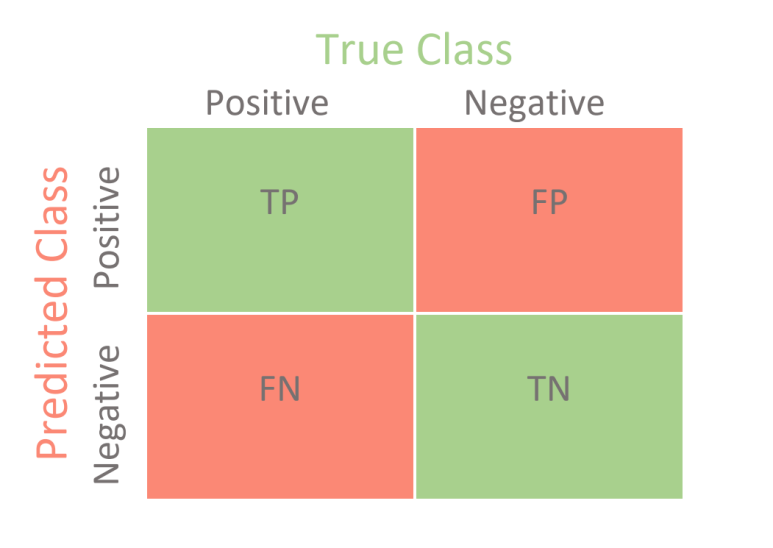


**2. 정밀도(Precision) : 모델이 예측한 것중에 얼마나 실제로 정답인가?**

$$ Precision = \frac {TP} {FP + TP}$$

True로 예측한 분석 대상 중에서 실제 값이 True인 비율을 말하며, 모형의 정확성을 나타내는 지표가 됩니다. 정확도가 높다는 것은 False Positive(실제 False를 True로 잘못 예측) 오류가 작다는 뜻입니다.


**3. 재현율(Recall) : 정답인것 중에 얼마나 정답을 예측해 내었나?** 


$$Recall = \frac {TP} {FN + TP}$$


실제 값이 True인 분석 대상 중에서 True로 예측하여 모형이 적중한 비율을 말하며, 모형의 완전성을 나타내는 지표이다. 재현율이 높다는 것은 False Nagative(실제 True를 False로 잘못 예측) 오류가 낮다는 뜻입니다.

**4. F1 지표(F1-score) : 정밀도와 재현율의 조화평균** 

$$F1 score = \frac {2} {\frac{1}{Recall} + \frac{1}{Precision}}$$

정확도와 재현율이 균등하게 반영될 수 있도록 정확도와 재현율의 조화 평균을 계산한 값으로, 모형의 예측력을 종합적으로 평가하는 지표입니다. 값이 높을수록 분류 모형의 예측력이 좋다고 말할 수 있습니다.





### **+++** 
- 평가지표에 대해 팀원분이 설명해 준 것 추가 

   
`재현율은 실제 참(TP+FN) 중에서 참 긍정(TP)의 비율`로 모델이 실제 참 중에서 얼마나 참 긍정을 구하였는가를 판단하는 지표가 됩니다.

 재현율은 거짓 부정으로 판단 시 위험이 큰 경우 중요한 지표가 되는데, 대표적으로 종양 음성, 양성 판정이 있습니다. 음성 종양을 양성 종양으로 판단한 경우(거짓 긍정)보다 양성 종양을 음성 종양(거짓 부정)으로 판단한 경우 더 위험하며, `거짓 부정 FN이 크면 클수록 재현율은 떨어지게 됩니다.`
 
사기 여부의 판단 시에도 사기가 아닌데 사기로 판단하는 경우(거짓 긍정)보다 사기인데 사기가 아닌 것으로 판단시(거짓 부정) 위험하며 재현율이 중요 지표로 사용될 수 있습니다.

`정밀도는 참이라 판단한 경우(TP+FP)에서 참 긍정(TP)의 비율`로 모델이 참 판단 중에서 실제 참을 얼마나 정밀하게 판단했는가를 나타냅니다. 정밀도는 거짓 긍정의 영향이 큰 경우 중요하게 사용됩니다.

 정밀도가 중요 지표인 대표적인 경우로 스팸 메일 판단할 때인데, 스펨 메일을 일반 메일로 판단하는 경우(거짓 부정)보다 일반 메일을 스펨 메일로 판단(거짓 긍정)하여 중요한 메일이 스팸처리되어 못받는다면 위험이 더 크다고 볼수 있습니다.
 
 `정밀도와 재현율을 정리하면`, 안 좋은 것을 좋은 것으로 판단 시 위험한 경우 재현율, 좋은 것을 안좋은것으로 판단시 위험한 경우 정밀도를 중요하게 보아야 합니다.
 
`F1 스코어`는 정밀도와 재현율의 길항관계(한쪽이 커지면 다른 한쪽이 줄어드는 관계)로 인한 단점을 보완해주기 위한 지표로 정밀도와 재현율의 조화 평균으로 구합니다. 그래서 F1 스코어는 두 지표가 균형을 이룰때 가장 큰 값이 되며, 한 지표가 커 질수록 작은 값이 되는 특성을 갖고 있습니다. `정밀도와 재현율이 가장 균형을 이루는 지점`을 찾기 위해 사용하곤 합니다.